In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.compose import ColumnTransformer
import time


In [2]:
training_data = pd.read_csv("C:\\Users\\dcris\\Desktop\\AA\\Assignement 1\\mlNOVA\\mlNOVA\\X_train.csv")

In [3]:
#training_data = training_data[(training_data[['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2',
       # 'x_3', 'y_3', 'v_x_3', 'v_y_3']] != 0).any(axis=1)]
training_data.describe()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
count,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06
mean,4.145262e+00,-2.812879e-01,-1.095159e-01,-1.841267e-01,-1.650011e-02,7.171403e-03,-8.201144e-02,3.247712e-02,-8.360838e-02,2.741165e-01,1.915273e-01,1.516496e-01,1.001085e-01,6.424995e+05
std,3.209813e+00,1.695764e+00,1.167686e+00,8.775115e-01,8.064175e-01,1.062984e+00,1.038606e+00,9.362290e-01,9.751777e-01,1.443411e+00,1.683294e+00,7.878988e-01,8.709405e-01,3.709477e+05
min,0.000000e+00,-3.082300e+01,-1.785773e+01,-7.299333e+01,-2.310928e+01,-3.083340e+01,-5.245081e+01,-2.589555e+01,-4.828901e+01,-1.743999e+01,-3.316000e+01,-3.097054e+01,-2.550938e+01,0.000000e+00
25%,1.054690e+00,-4.118489e-01,-3.928434e-01,-5.782370e-01,-2.266108e-01,-3.295574e-01,-1.918623e-01,-2.983937e-01,-4.984175e-01,-4.324075e-01,-4.472183e-01,-1.019181e-01,-2.062900e-01,3.212498e+05
50%,3.945310e+00,0.000000e+00,0.000000e+00,-6.909794e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.306061e-04,6.181826e-02,1.402483e-02,6.424995e+05
75%,6.953120e+00,5.008268e-01,2.634242e-01,1.321657e-01,2.444148e-01,2.103091e-01,2.683916e-01,3.880151e-01,3.262901e-01,5.005791e-01,3.508870e-01,4.864241e-01,4.975648e-01,9.637492e+05
max,1.000000e+01,1.634061e+01,2.627623e+01,2.350346e+01,3.467168e+01,1.550696e+01,3.567946e+01,7.271823e+01,2.311835e+01,6.165640e+01,2.773554e+01,2.596499e+01,4.828874e+01,1.284999e+06


In [4]:
training_data.columns,

(Index(['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2',
        'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id'],
       dtype='object'),)

In [5]:
idx = np.hstack((0, training_data[training_data.t == 10].index.values + 1))
idx.shape, training_data.t.min(),training_data.t.max()

((4054,), 0.0, 10.0)

In [6]:
training_data[250:267]

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
250,9.765620,1.429159,1.095073,0.688380,0.445627,0.960411,1.241867,-0.066882,0.125804,-2.389569,-2.336940,-0.621497,-0.571431,250
251,9.804690,1.453083,1.113340,0.538111,0.488067,0.960721,1.245879,0.081195,0.081207,-2.413804,-2.359219,-0.619305,-0.569274,251
252,9.843750,1.471277,1.133103,0.393917,0.522702,0.966676,1.248312,0.223239,0.044456,-2.437953,-2.381415,-0.617155,-0.567159,252
253,9.882810,1.483859,1.154101,0.249804,0.551574,0.978161,1.249428,0.365240,0.013509,-2.462019,-2.403529,-0.615044,-0.565083,253
254,9.921880,1.490718,1.176133,0.099868,0.575697,0.995286,1.249430,0.513104,-0.012651,-2.486004,-2.425563,-0.612972,-0.563046,254
255,9.960940,1.491492,1.199018,-0.063145,0.595242,1.018416,1.248499,0.674080,-0.034194,-2.509908,-2.447517,-0.610936,-0.561048,255
256,10.000000,1.485476,1.222565,-0.250131,0.609230,1.048258,1.246830,0.859066,-0.050144,-2.533734,-2.469395,-0.608935,-0.559086,256
257,0.000000,1.000000,0.000000,0.000000,0.000000,-0.176502,0.555739,0.000000,0.000000,-0.823498,-0.555739,0.000000,0.000000,257
258,0.039062,0.999392,0.000131,-0.031160,0.006723,-0.176326,0.555148,0.008985,-0.030279,-0.823065,-0.555279,0.022176,0.023556,258
259,0.078125,0.997564,0.000525,-0.062415,0.013460,-0.175799,0.553372,0.017992,-0.060639,-0.821765,-0.553898,0.044423,0.047179,259


828


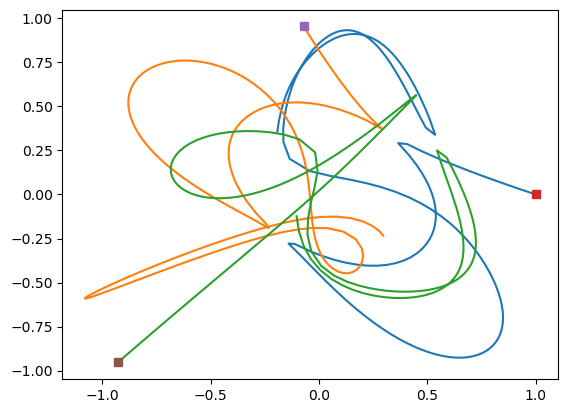

In [7]:
k = np.random.randint(idx.shape[0])
print(k)
pltidx = range(idx[k], 257 + idx[k])
pltsquare = idx[k]

plt.plot(training_data.x_1[pltidx], training_data.y_1[pltidx])
plt.plot(training_data.x_2[pltidx], training_data.y_2[pltidx])
plt.plot(training_data.x_3[pltidx], training_data.y_3[pltidx])

plt.plot(training_data.x_1[pltsquare], training_data.y_1[pltsquare], 's')
plt.plot(training_data.x_2[pltsquare], training_data.y_2[pltsquare], 's')
plt.plot(training_data.x_3[pltsquare], training_data.y_3[pltsquare], 's')

In [8]:
training_data['trajectory_id'] = (training_data.index // 257) + 1
training_data[250:267]

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id,trajectory_id
250,9.765620,1.429159,1.095073,0.688380,0.445627,0.960411,1.241867,-0.066882,0.125804,-2.389569,-2.336940,-0.621497,-0.571431,250,1
251,9.804690,1.453083,1.113340,0.538111,0.488067,0.960721,1.245879,0.081195,0.081207,-2.413804,-2.359219,-0.619305,-0.569274,251,1
252,9.843750,1.471277,1.133103,0.393917,0.522702,0.966676,1.248312,0.223239,0.044456,-2.437953,-2.381415,-0.617155,-0.567159,252,1
253,9.882810,1.483859,1.154101,0.249804,0.551574,0.978161,1.249428,0.365240,0.013509,-2.462019,-2.403529,-0.615044,-0.565083,253,1
254,9.921880,1.490718,1.176133,0.099868,0.575697,0.995286,1.249430,0.513104,-0.012651,-2.486004,-2.425563,-0.612972,-0.563046,254,1
255,9.960940,1.491492,1.199018,-0.063145,0.595242,1.018416,1.248499,0.674080,-0.034194,-2.509908,-2.447517,-0.610936,-0.561048,255,1
256,10.000000,1.485476,1.222565,-0.250131,0.609230,1.048258,1.246830,0.859066,-0.050144,-2.533734,-2.469395,-0.608935,-0.559086,256,1
257,0.000000,1.000000,0.000000,0.000000,0.000000,-0.176502,0.555739,0.000000,0.000000,-0.823498,-0.555739,0.000000,0.000000,257,2
258,0.039062,0.999392,0.000131,-0.031160,0.006723,-0.176326,0.555148,0.008985,-0.030279,-0.823065,-0.555279,0.022176,0.023556,258,2
259,0.078125,0.997564,0.000525,-0.062415,0.013460,-0.175799,0.553372,0.017992,-0.060639,-0.821765,-0.553898,0.044423,0.047179,259,2


In [20]:
#1.2

# Obter os IDs únicos das trajetórias
unique_trajectories = training_data['trajectory_id'].unique()

# Dividir os IDs das trajetórias em conjuntos de treino e teste
train_trajectories, test_trajectories = train_test_split(unique_trajectories, test_size=0.2, random_state=0)

# Filtrar os dados com base nos IDs das trajetórias
train_data = training_data[training_data['trajectory_id'].isin(train_trajectories)]
test_data = training_data[training_data['trajectory_id'].isin(test_trajectories)]

# Dividir o conjunto de treino em treino e validação
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=0)

# Separar X e y para treino, validação e teste
X_train = train_data[['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3']]
y_train = train_data[['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3']].shift(-1).dropna()

X_val = val_data[['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3']]
y_val = val_data[['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3']].shift(-1).dropna()

X_test = test_data[['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3']]
y_test = test_data[['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3']].shift(-1).dropna()

# Ajuste final para remover última linha de X e alinhar com y
X_train = X_train.iloc[:-1]
X_val = X_val.iloc[:-1]
X_test = X_test.iloc[:-1]

# Remover a coluna trajectory_id, se necessário
X_train = X_train.drop(columns=['trajectory_id'], errors='ignore')
y_train = y_train.drop(columns=['trajectory_id'], errors='ignore')

X_val = X_val.drop(columns=['trajectory_id'], errors='ignore')
y_val = y_val.drop(columns=['trajectory_id'], errors='ignore')

X_test = X_test.drop(columns=['trajectory_id'], errors='ignore')
y_test = y_test.drop(columns=['trajectory_id'], errors='ignore')


# Continuar com o pipeline
pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train, y_train)

# Gerar previsões
y_pred = pipeline.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3'])

# Adicionar coluna de IDs (índices)
index_ids = np.arange(len(y_pred_df))
y_pred_df.insert(0, 'Id', index_ids)

# Salvar o DataFrame final no CSV
y_pred_df.to_csv('baseline-model.csv', index=False)

# Calcular e imprimir o MSE
mse = mean_squared_error(y_test, y_pred)
print(mse)
print(len(y_pred_df))  # Deve ser 1041621


1.760078837406426
256999


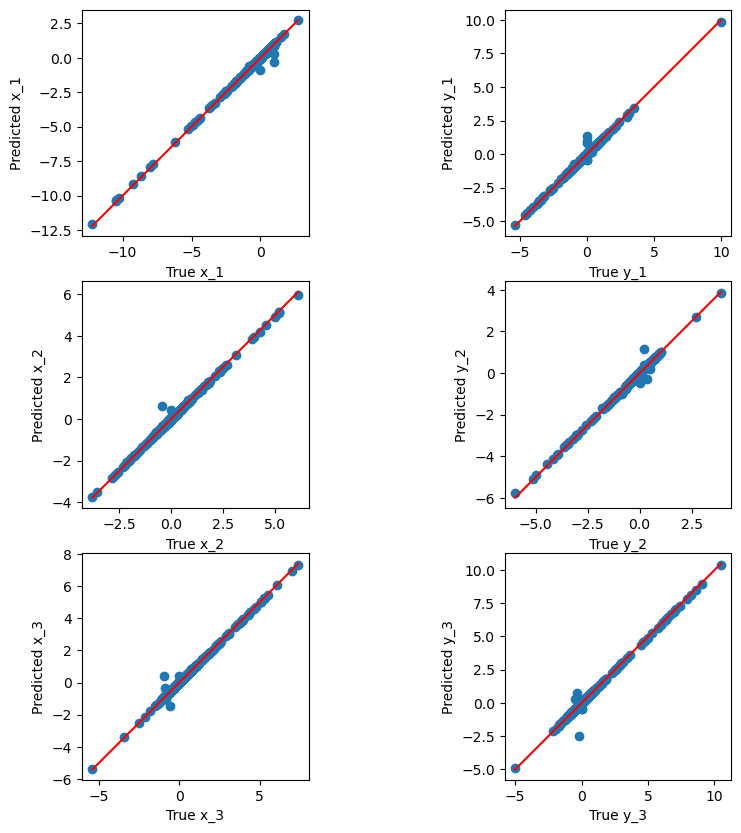

In [11]:
def plot_y_hat(y_test,y_pred, plot_title = "plot"):
    labels = ['x_1','y_1','x_2','y_2','x_3','y_3']
    MAX = 500
    if len(y_test) > MAX:
        idx = np.random.choice(len(y_test),MAX, replace=False)
    else:
        idx = np.arange(len(y_test))
    plt.figure(figsize=(10,10))
    for i in range(6):
        x0 = np.min(y_test[idx,i])
        x1 = np.max(y_test[idx,i])
        plt.subplot(3,2,i+1)
        plt.scatter(y_test[idx,i],y_pred[idx,i])
        plt.xlabel('True '+labels[i])
        plt.ylabel('Predicted '+labels[i])
        plt.plot([x0,x1],[x0,x1],color='red')
        plt.axis('square')
    plt.savefig(plot_title+'.pdf')
    plt.show()

plot_y_hat(y_test.to_numpy(), y_pred, plot_title="Predicted_vs_True")

In [12]:
def validate_poly_regression(X_train, y_train, X_val, y_val, regressor=None, degrees=range(1, 15), max_features=None):
    best_model = None
    best_rmse = float('inf')
    best_degree = 0

    for degree in degrees:
        pipeline = make_pipeline(PolynomialFeatures(degree), RidgeCV())
        pipeline.fit(X_train, y_train)
        
        y_val_pred = pipeline.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        
        print(f"Degree {degree}: RMSE = {rmse}")
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = pipeline
            best_degree = degree

        # Print número de features geradas
        print(f"Number of features for degree {degree}: {pipeline.named_steps['polynomialfeatures'].n_output_features_}")

    return best_model, best_rmse, best_degree




In [15]:
# Exemplo de uso com amostra de 1% dos dados
X_train_sample = X_train.sample(frac=0.01, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

X_val_sample = X_val.sample(frac=0.01, random_state=42)
y_val_sample = y_val.loc[X_val_sample.index]

# Rodar a validação
best_model, best_rmse, best_degree = validate_poly_regression(X_train_sample, y_train_sample, X_val_sample, y_val_sample)

print(f"Melhor grau polinomial: {best_degree}, com RMSE = {best_rmse}")


Degree 1: RMSE = 1.3868477696091055
Number of features for degree 1: 13
Degree 2: RMSE = 1.3895416900996027
Number of features for degree 2: 91
Degree 3: RMSE = 1.4135987306001283
Number of features for degree 3: 455


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Rodar a função 10 vezes e coletar os melhores graus
best_degrees = []
for _ in range(10):
    _, _, best_degree = validate_poly_regression(X_train_sample, y_train_sample, X_val_sample, y_val_sample)
    best_degrees.append(best_degree)

# Plotar a distribuição dos melhores graus
plt.hist(best_degrees, bins=len(degrees), edgecolor='black')
plt.xlabel('Grau Polinomial')
plt.ylabel('Frequência')
plt.title('Distribuição dos Melhores Graus Polinomiais')
plt.show()


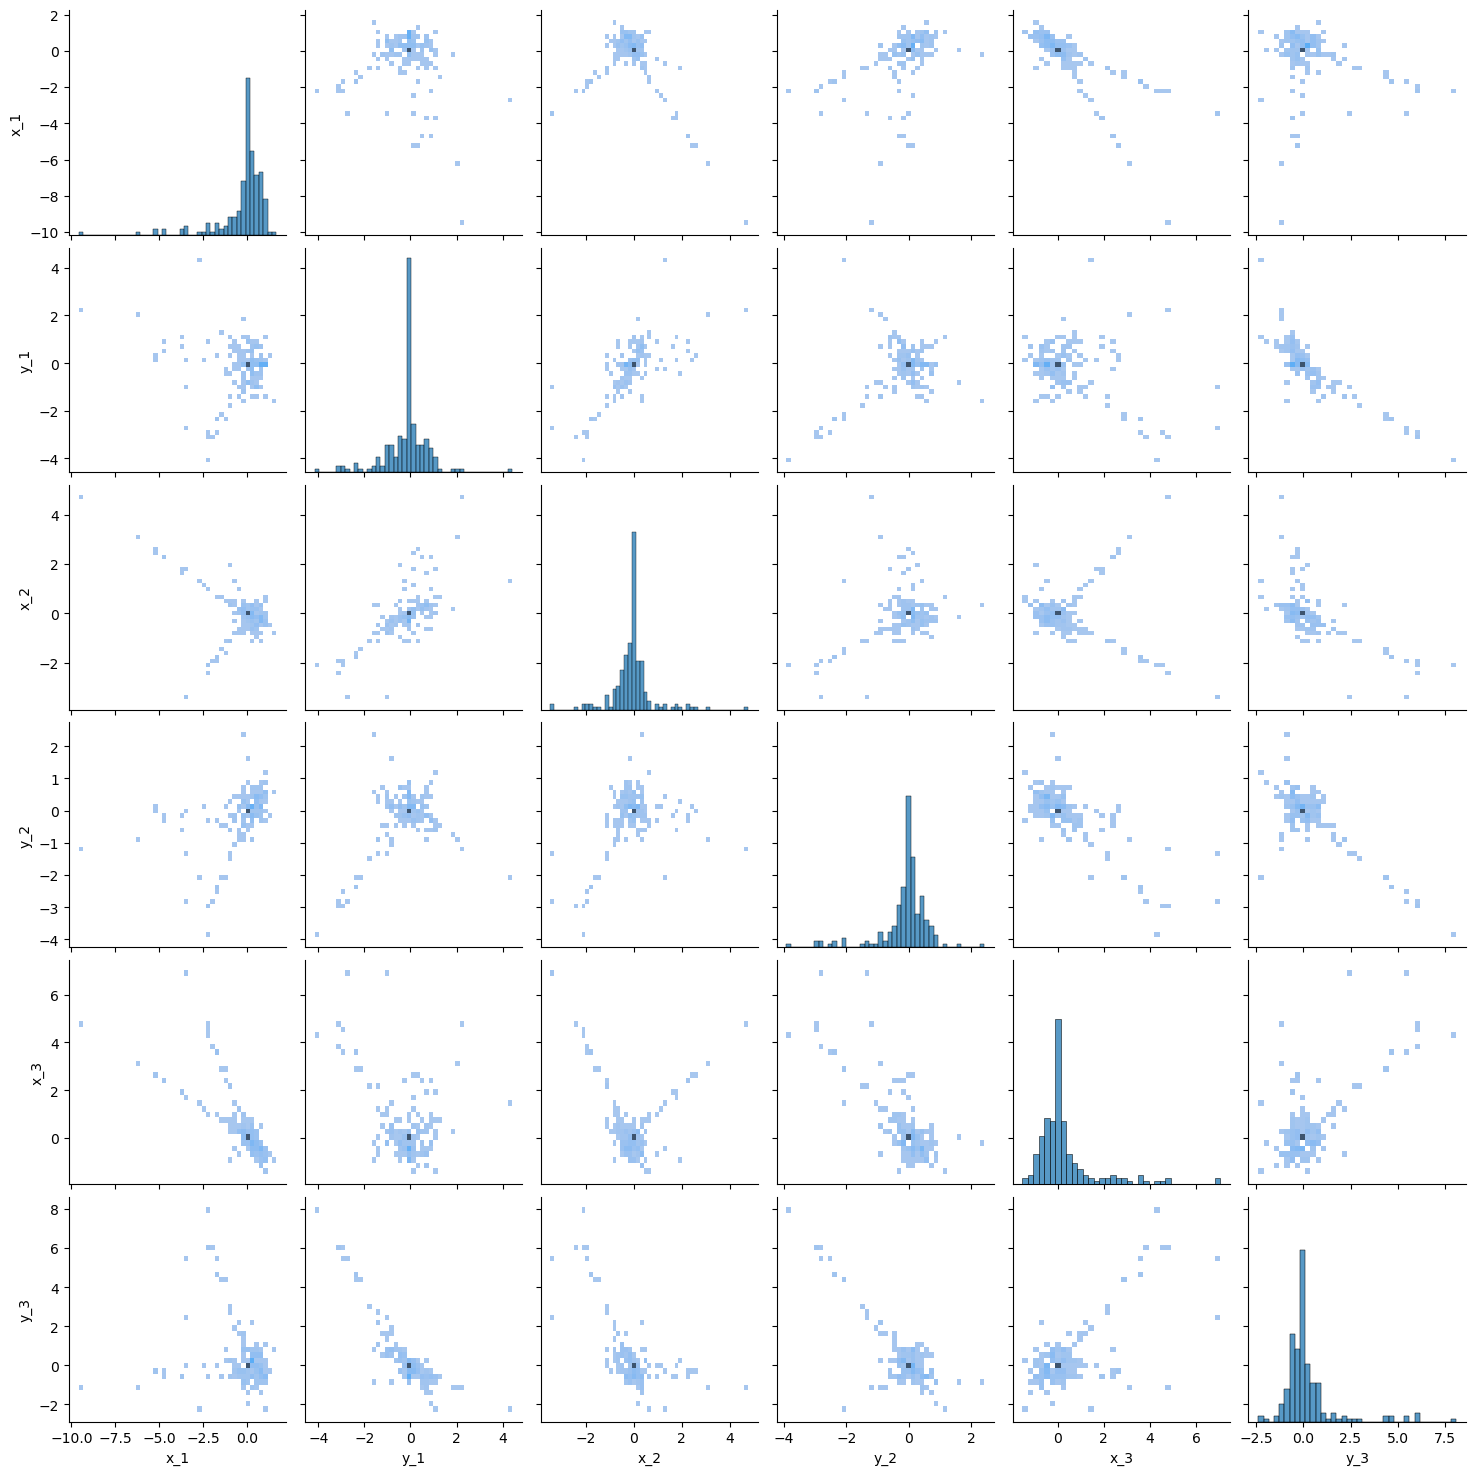

In [24]:
#3
import seaborn as sns

pairplot = sns.pairplot(training_data[['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3']].sample(200), kind="hist")

<Axes: >

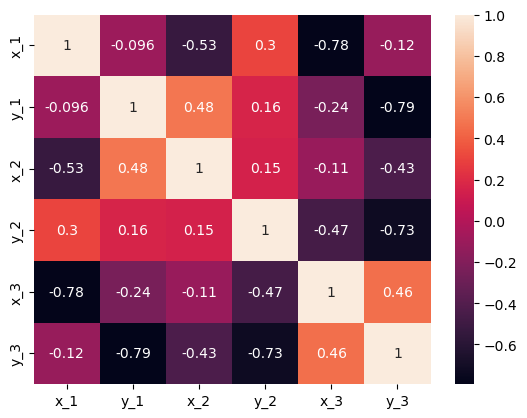

In [23]:
corr = training_data[['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3']].corr()
sns.heatmap(corr,annot=True)

In [29]:
#1. Ordenar Interações por Valor Absoluto de Correlação
corr_matrix = training_data[['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3']].corr().abs().unstack()
sorted_corr = corr_matrix.sort_values(kind="quicksort", ascending=False)
print(sorted_corr)

x_1  x_1    1.000000
y_1  y_1    1.000000
x_3  x_3    1.000000
y_2  y_2    1.000000
x_2  x_2    1.000000
y_3  y_3    1.000000
y_1  y_3    0.793226
y_3  y_1    0.793226
x_1  x_3    0.782191
x_3  x_1    0.782191
y_3  y_2    0.728914
y_2  y_3    0.728914
x_1  x_2    0.533159
x_2  x_1    0.533159
y_1  x_2    0.483959
x_2  y_1    0.483959
x_3  y_2    0.465291
y_2  x_3    0.465291
x_3  y_3    0.455773
y_3  x_3    0.455773
x_2  y_3    0.429479
y_3  x_2    0.429479
x_1  y_2    0.300793
y_2  x_1    0.300793
x_3  y_1    0.243170
y_1  x_3    0.243170
y_2  y_1    0.161318
y_1  y_2    0.161318
y_2  x_2    0.151960
x_2  y_2    0.151960
x_1  y_3    0.118730
y_3  x_1    0.118730
x_3  x_2    0.110067
x_2  x_3    0.110067
x_1  y_1    0.096385
y_1  x_1    0.096385
dtype: float64


RMSE before removing : 1.326623760473806
RMSE after removing : 1.326623760329232


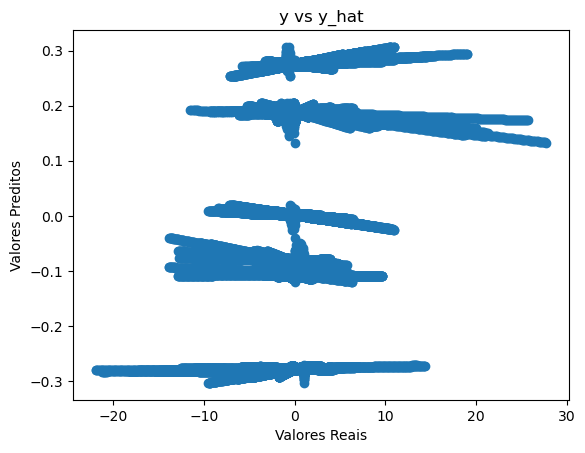

In [34]:
#2. Eliminar Variáveis Redundantes e Avaliar Impacto
##y_1
# Eliminar variável e recalcular modelo

pipeline = make_pipeline(PolynomialFeatures(1), RidgeCV())
pipeline.fit(X_train, y_train)
        
y_test_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RMSE before removing : {rmse}')
        

X_train_reduced = X_train.drop(columns=['y_1'])  # Exemplo
pipeline.fit(X_train_reduced, y_train)
y_pred = pipeline.predict(X_test.drop(columns=['y_1']))

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE after removing : {rmse}')

#Criar Plots para Justificar as Escolhas
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('y vs y_hat')
plt.show()

RMSE before removing : 1.326623760473806
RMSE after removing : 1.3266237601318298


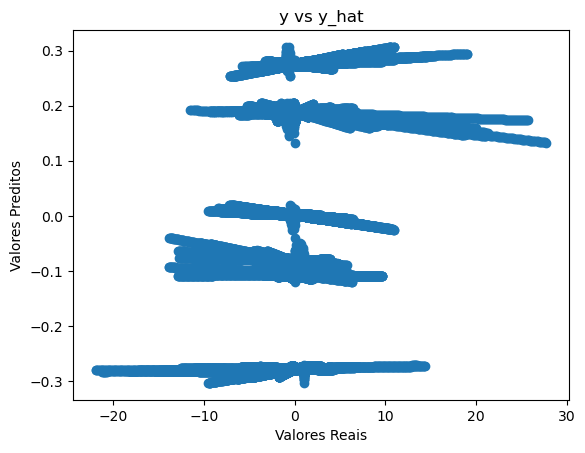

In [35]:
#2. Eliminar Variáveis Redundantes e Avaliar Impacto
##y_3
# Eliminar variável e recalcular modelo

pipeline = make_pipeline(PolynomialFeatures(1), RidgeCV())
pipeline.fit(X_train, y_train)
        
y_test_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RMSE before removing : {rmse}')
        

X_train_reduced = X_train.drop(columns=['y_3'])  # Exemplo
pipeline.fit(X_train_reduced, y_train)
y_pred = pipeline.predict(X_test.drop(columns=['y_3']))

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE after removing : {rmse}')


#Criar Plots para Justificar as Escolhas
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('y vs y_hat')
plt.show()